# SNOW network extraction

The SNOW algorithm, [published in Physical Review E](https://doi.org/10.1103/PhysRevE.96.023307), uses a marker-based watershed segmentation algorithm to partition an image into regions belonging to each pore.  The main contribution of the SNOW algorithm is to find a suitable set of initial markers in the image so that the watershed is not over-segmented.  SNOW is an acronym for Sub-Network of an Over-segmented Watershed.  This code works on both 2D and 3D images.  In this example a 2D image will be segmented using the predefined ``snow`` function in PoreSpy. 

Start by importing the necessary packages:

In [1]:
import numpy as np
import porespy as ps
import openpnm as op
import matplotlib.pyplot as plt
ps.visualization.set_mpl_style()
np.random.seed(10)

Generate an artificial 2D image for illustration purposes:

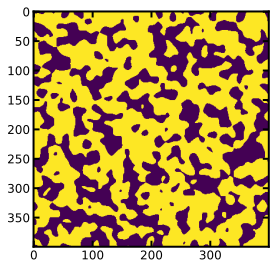

In [2]:
im = ps.generators.blobs(shape=[400, 400], porosity=0.6, blobiness=2)
fig, ax = plt.subplots(figsize=(4, 4))
ax.imshow(im);

SNOW is composed of a series of filters, but PoreSpy has a single function that applies all the necessary steps:

In [3]:
snow_output = ps.networks.snow2(im, voxel_size=1)

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

0it [00:00, ?it/s]

Extracting pore and throat properties:   0%|          | 0/259 [00:00<?, ?it/s]

The ``snow`` function returns an object that has a ``network`` attribute.  This is a dictionary that is suitable for loading into OpenPNM.  The best way to get this into OpenPNM is to use the ``PoreSpy`` IO class.  This splits the data into a network and a geometry:

In [4]:
try:
    proj = op.io.PoreSpy.import_data(snow_output.network)
except AttributeError:
    proj = op.io.from_porespy(snow_output.network)

As can be seen by printing the project, it contains two objects:

In [5]:
print(proj)

――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 Object Name     Object ID                                                        
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――
 net_01          <openpnm.network.GenericNetwork object at 0x7f66a9c20040>        
 geo_01          <openpnm.geometry.Imported object at 0x7f66a9b75b80>             
――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――――


The network and geometry objects can be retrieved from the project as follows:

In [6]:
pn = proj['net_01']
geo = proj['geo_01']

You can also overlay the network on the image natively in `porespy`. Note that you need to transpose the image using `im.T`, since `imshow` uses matrix representation, e.g. a (10, 20)-shaped array is shown as 10 pixels in the y-axis, and 20 pixels in the x-axis.

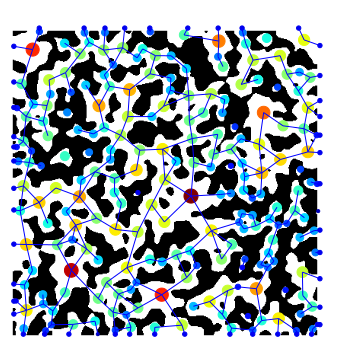

In [7]:
fig, ax = plt.subplots(figsize=[5, 5])
ax.imshow(im.T, cmap=plt.cm.bone);
op.topotools.plot_coordinates(ax=fig,
                              network=pn,
                              size_by=pn["pore.inscribed_diameter"],
                              color_by=pn["pore.inscribed_diameter"],
                              markersize=200)
op.topotools.plot_connections(network=pn, ax=fig)
ax.axis("off");